In [3]:
import pandas as pd
import re
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
# import matplotlib as mpl
# mpl.rcParams['xtick.labelsize'] = 14
import seaborn as sns
from matplotlib.pyplot import figure
sns.set()

In [4]:
datadf = pd.read_csv('All Data/Raw Journey Data/Until16May2020(all jsons to csv).csv')
datadf.rename(columns={'Unnamed: 0':'id'}, inplace=True)
datadf.set_index('id', inplace=True)
datadf.head()

,no_stop,text,date_modified,date_journal,address,lat,lon,mood,timezone,favourite,weather,photos,tags,no_punc,is_personal
id,,,,,,,,,,,,,,,
1439137473084-3fc756cc3f8d6404,first thing saw entered room dark curtains dra...,"The first thing I saw ,when I entered her room...",2017-08-31 01:44:57,2015-08-09 11:24:33,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],"['personal', 'published']",The first thing I saw when I entered her room ...,1
1439198245820-3fda14add91e3f20,Philosophy surprises mehw u effortlessly make ...,Philosophy\n\n\n\n\n\n\nIt surprises me..hw u ...,2017-08-22 22:08:05,2015-08-10 04:17:25,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['personal'],Philosophy It surprises mehw u so effortlessly...,1
1439198461993-3fefd6db711e0342,Write fantasiesinaginary dream world stories M...,Me \n\n\nWrite fantasies/inaginary dream world...,2017-10-08 12:24:49,2015-08-10 04:21:01,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['me'],Me Write fantasiesinaginary dream world storie...,0
1439575035515-3feb330512548cbd,dwarfs garden garden little boy Guarded roses ...,"The dwarfs garden\n\nHe had a garden ,that lit...",2016-04-29 05:23:44,2015-08-14 12:57:15,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['published'],The dwarfs garden He had a garden that little ...,0
1440393646546-3fdb2bc02b9f8020,Brigadier Suraj singh name brigadier suraj sin...,Brigadier Suraj singh\n\nMy name is brigadier ...,2017-08-18 05:27:31,2015-08-24 00:20:46,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['script'],Brigadier Suraj singh My name is brigadier sur...,0


In [5]:
timedata = pd.read_csv('All Data/Raw Journey Data/TimeDataUntil16May2020.csv')
timedata = timedata.set_index(timedata.columns[0])
timedata.head()

,date_journal,year,month,day,hour,minute,dayofweek,day_num,month_num,month_name,year_month,minute_of_day
id,,,,,,,,,,,,
1439137473084-3fc756cc3f8d6404,2015-08-09 11:24:33,2015,8,9,11,24,6,0,0,aug,2015 aug,684
1439198245820-3fda14add91e3f20,2015-08-10 04:17:25,2015,8,10,4,17,0,1,0,aug,2015 aug,257
1439198461993-3fefd6db711e0342,2015-08-10 04:21:01,2015,8,10,4,21,0,1,0,aug,2015 aug,261
1439575035515-3feb330512548cbd,2015-08-14 12:57:15,2015,8,14,12,57,4,5,0,aug,2015 aug,777
1440393646546-3fdb2bc02b9f8020,2015-08-24 00:20:46,2015,8,24,0,20,0,15,0,aug,2015 aug,20


In [6]:
drop_cols = ['text','date_modified','address','mood','favourite','weather','photos','tags']
datadf = datadf.drop(columns = drop_cols)

In [21]:
tidy_format = pd.read_csv('All Data/Raw Journey Data/TidyFormatUntil16May2020.csv').drop(columns='word')

In [22]:
words = ['enke','nidhi','kelkar','aesthetic','sunflower','sunflowers', 'saurav', 'patwardhan']

In [28]:
tidy_format['mentioned(entry)'] = tidy_format['lower'].isin(words).astype(int)

In [33]:
sent = tidy_format.groupby('id').sum().merge(timedata, on='id')[['day_num','month_num','minute_of_day','year_month', 'score', 'mentioned(entry)']]

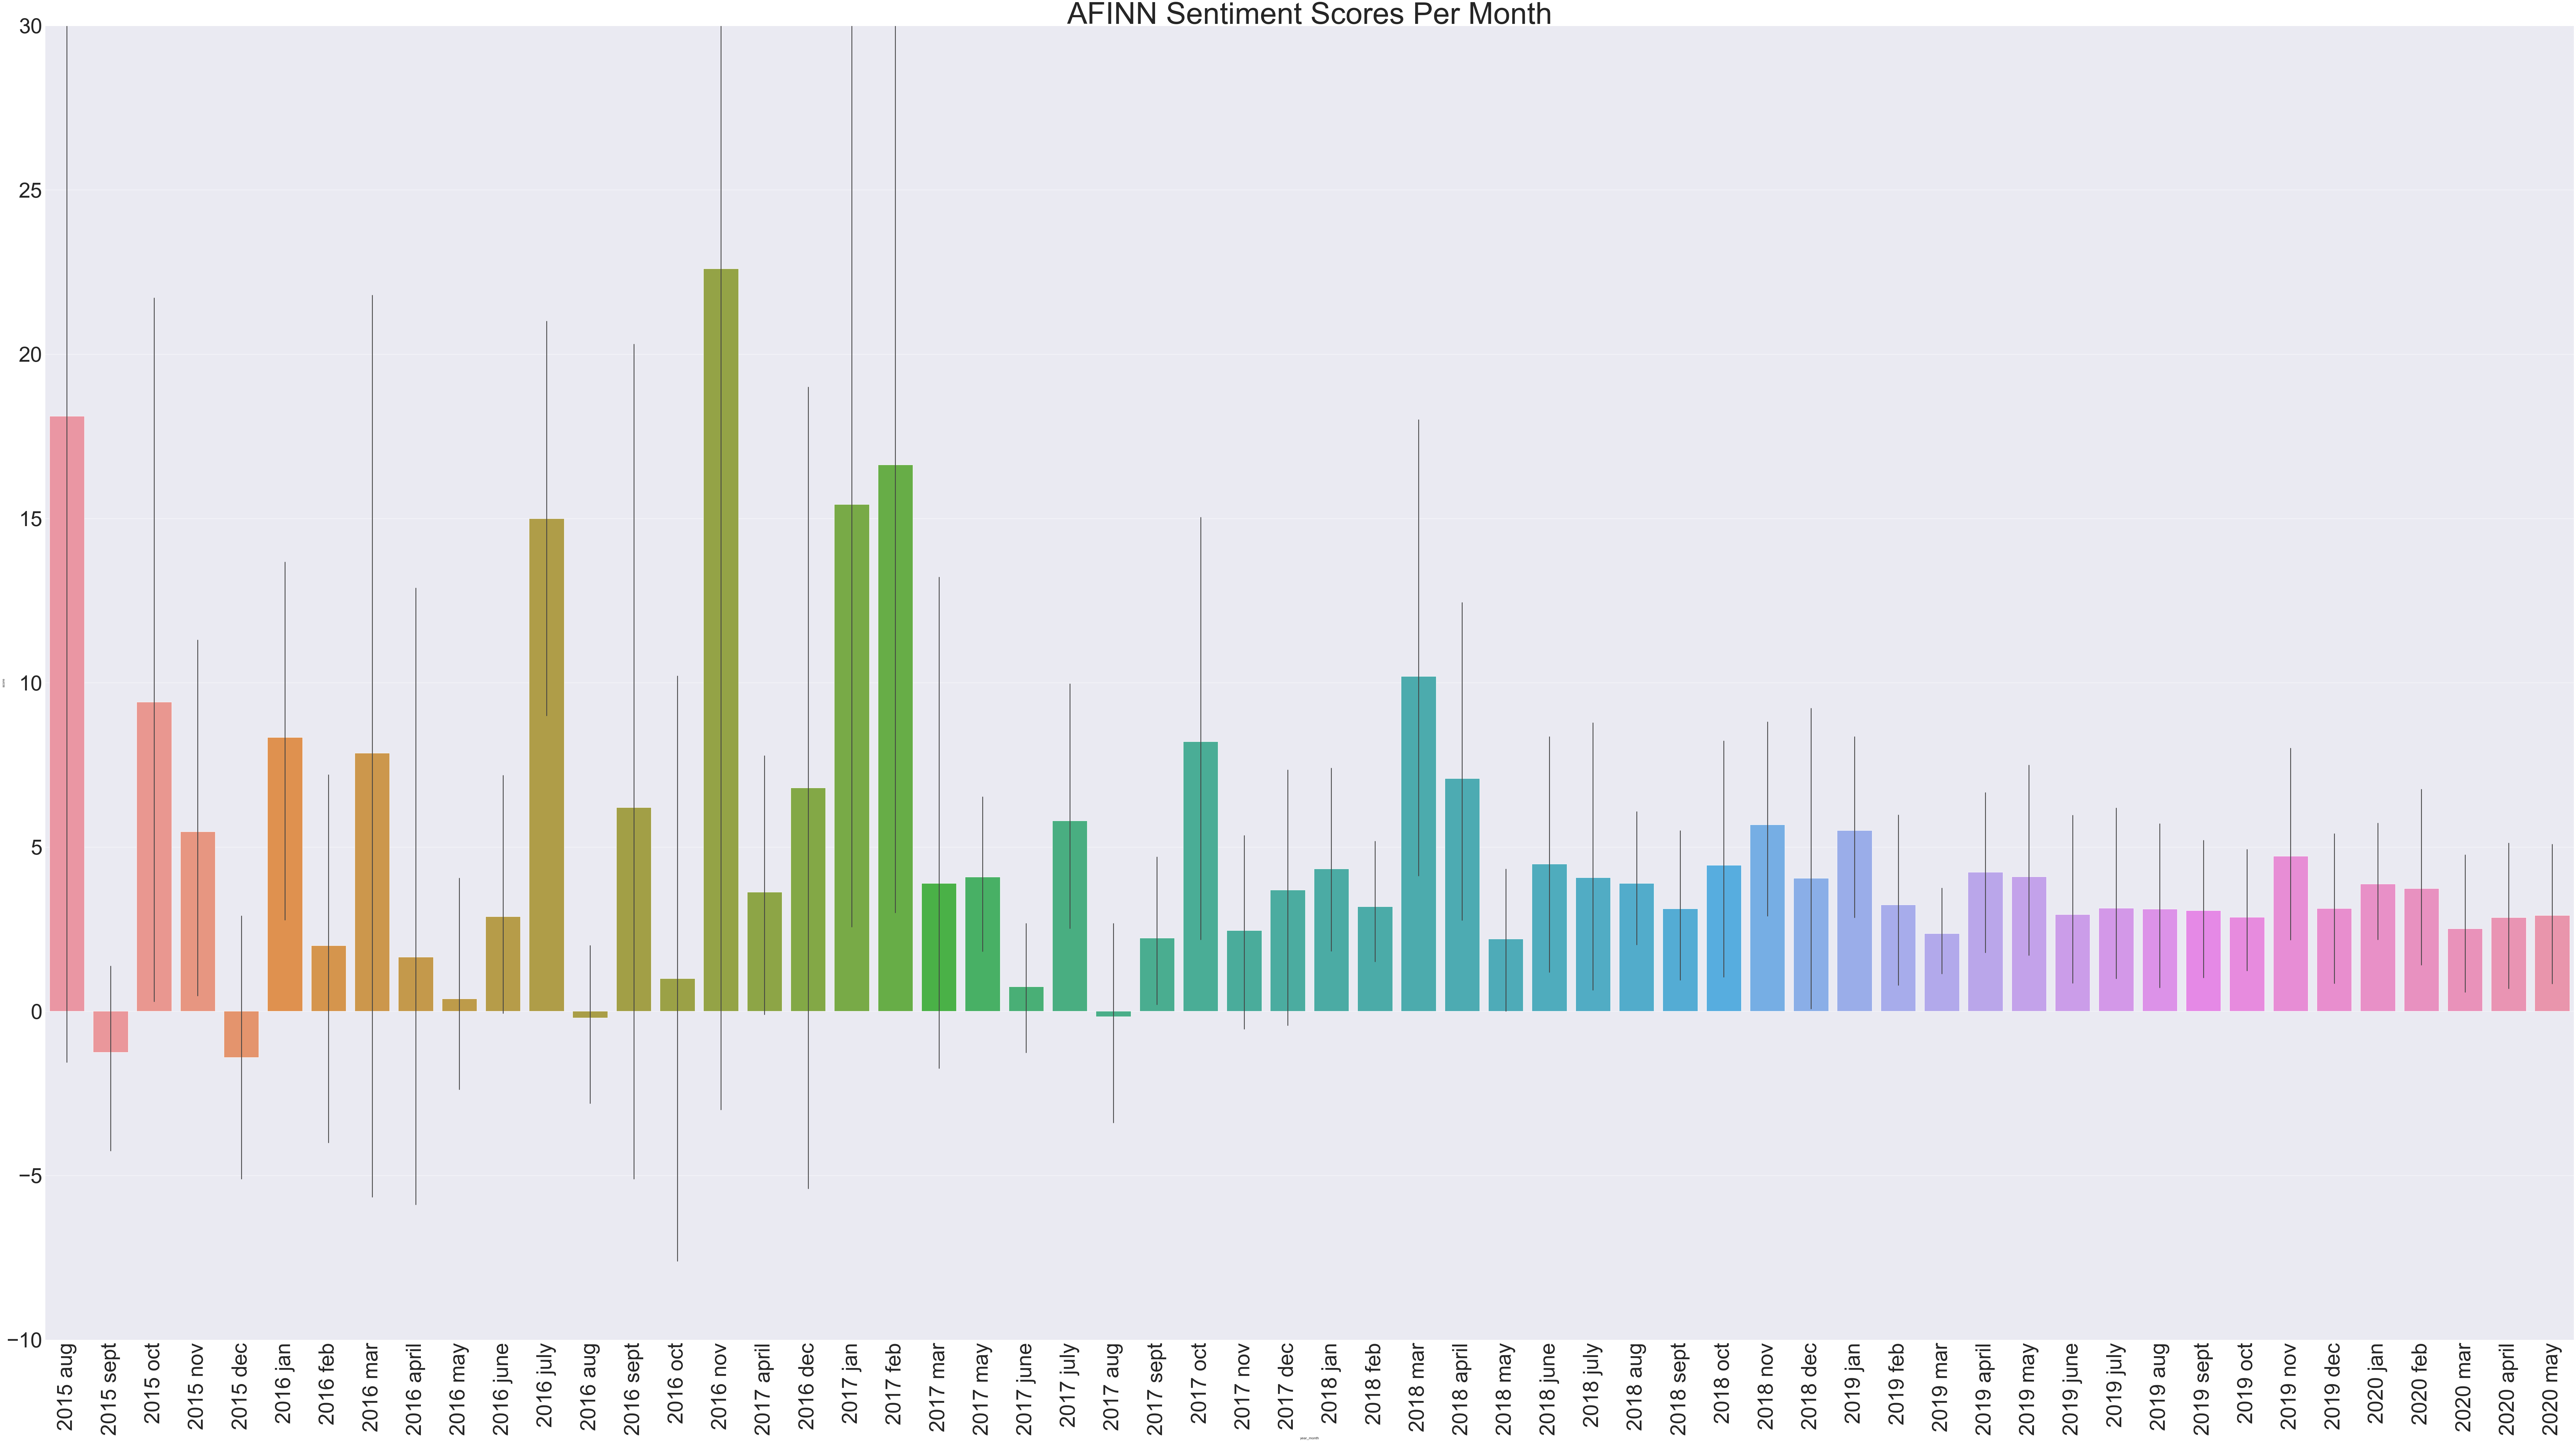

In [46]:
fig, ax = plt.subplots(figsize = (150,80))
sns.barplot(sent['year_month'], sent['score'], ax=ax)
plt.xticks(fontsize=70, rotation=90)
plt.yticks(fontsize=70)
plt.ylim(-10,30)
# start, end = ax.get_xlim()
# ax.xaxis.set_ticks(np.arange(start, end, 100))
# sns.barplot(sent['day_num'], sent['score'])
plt.title(label='AFINN Sentiment Scores Per Month', fontsize=100)
# plt.savefig('Figures saved from analyses/Monthly AFINN Sentiment(16May2020).png')

(array([-40., -20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 9 Text major ticklabel objects>)

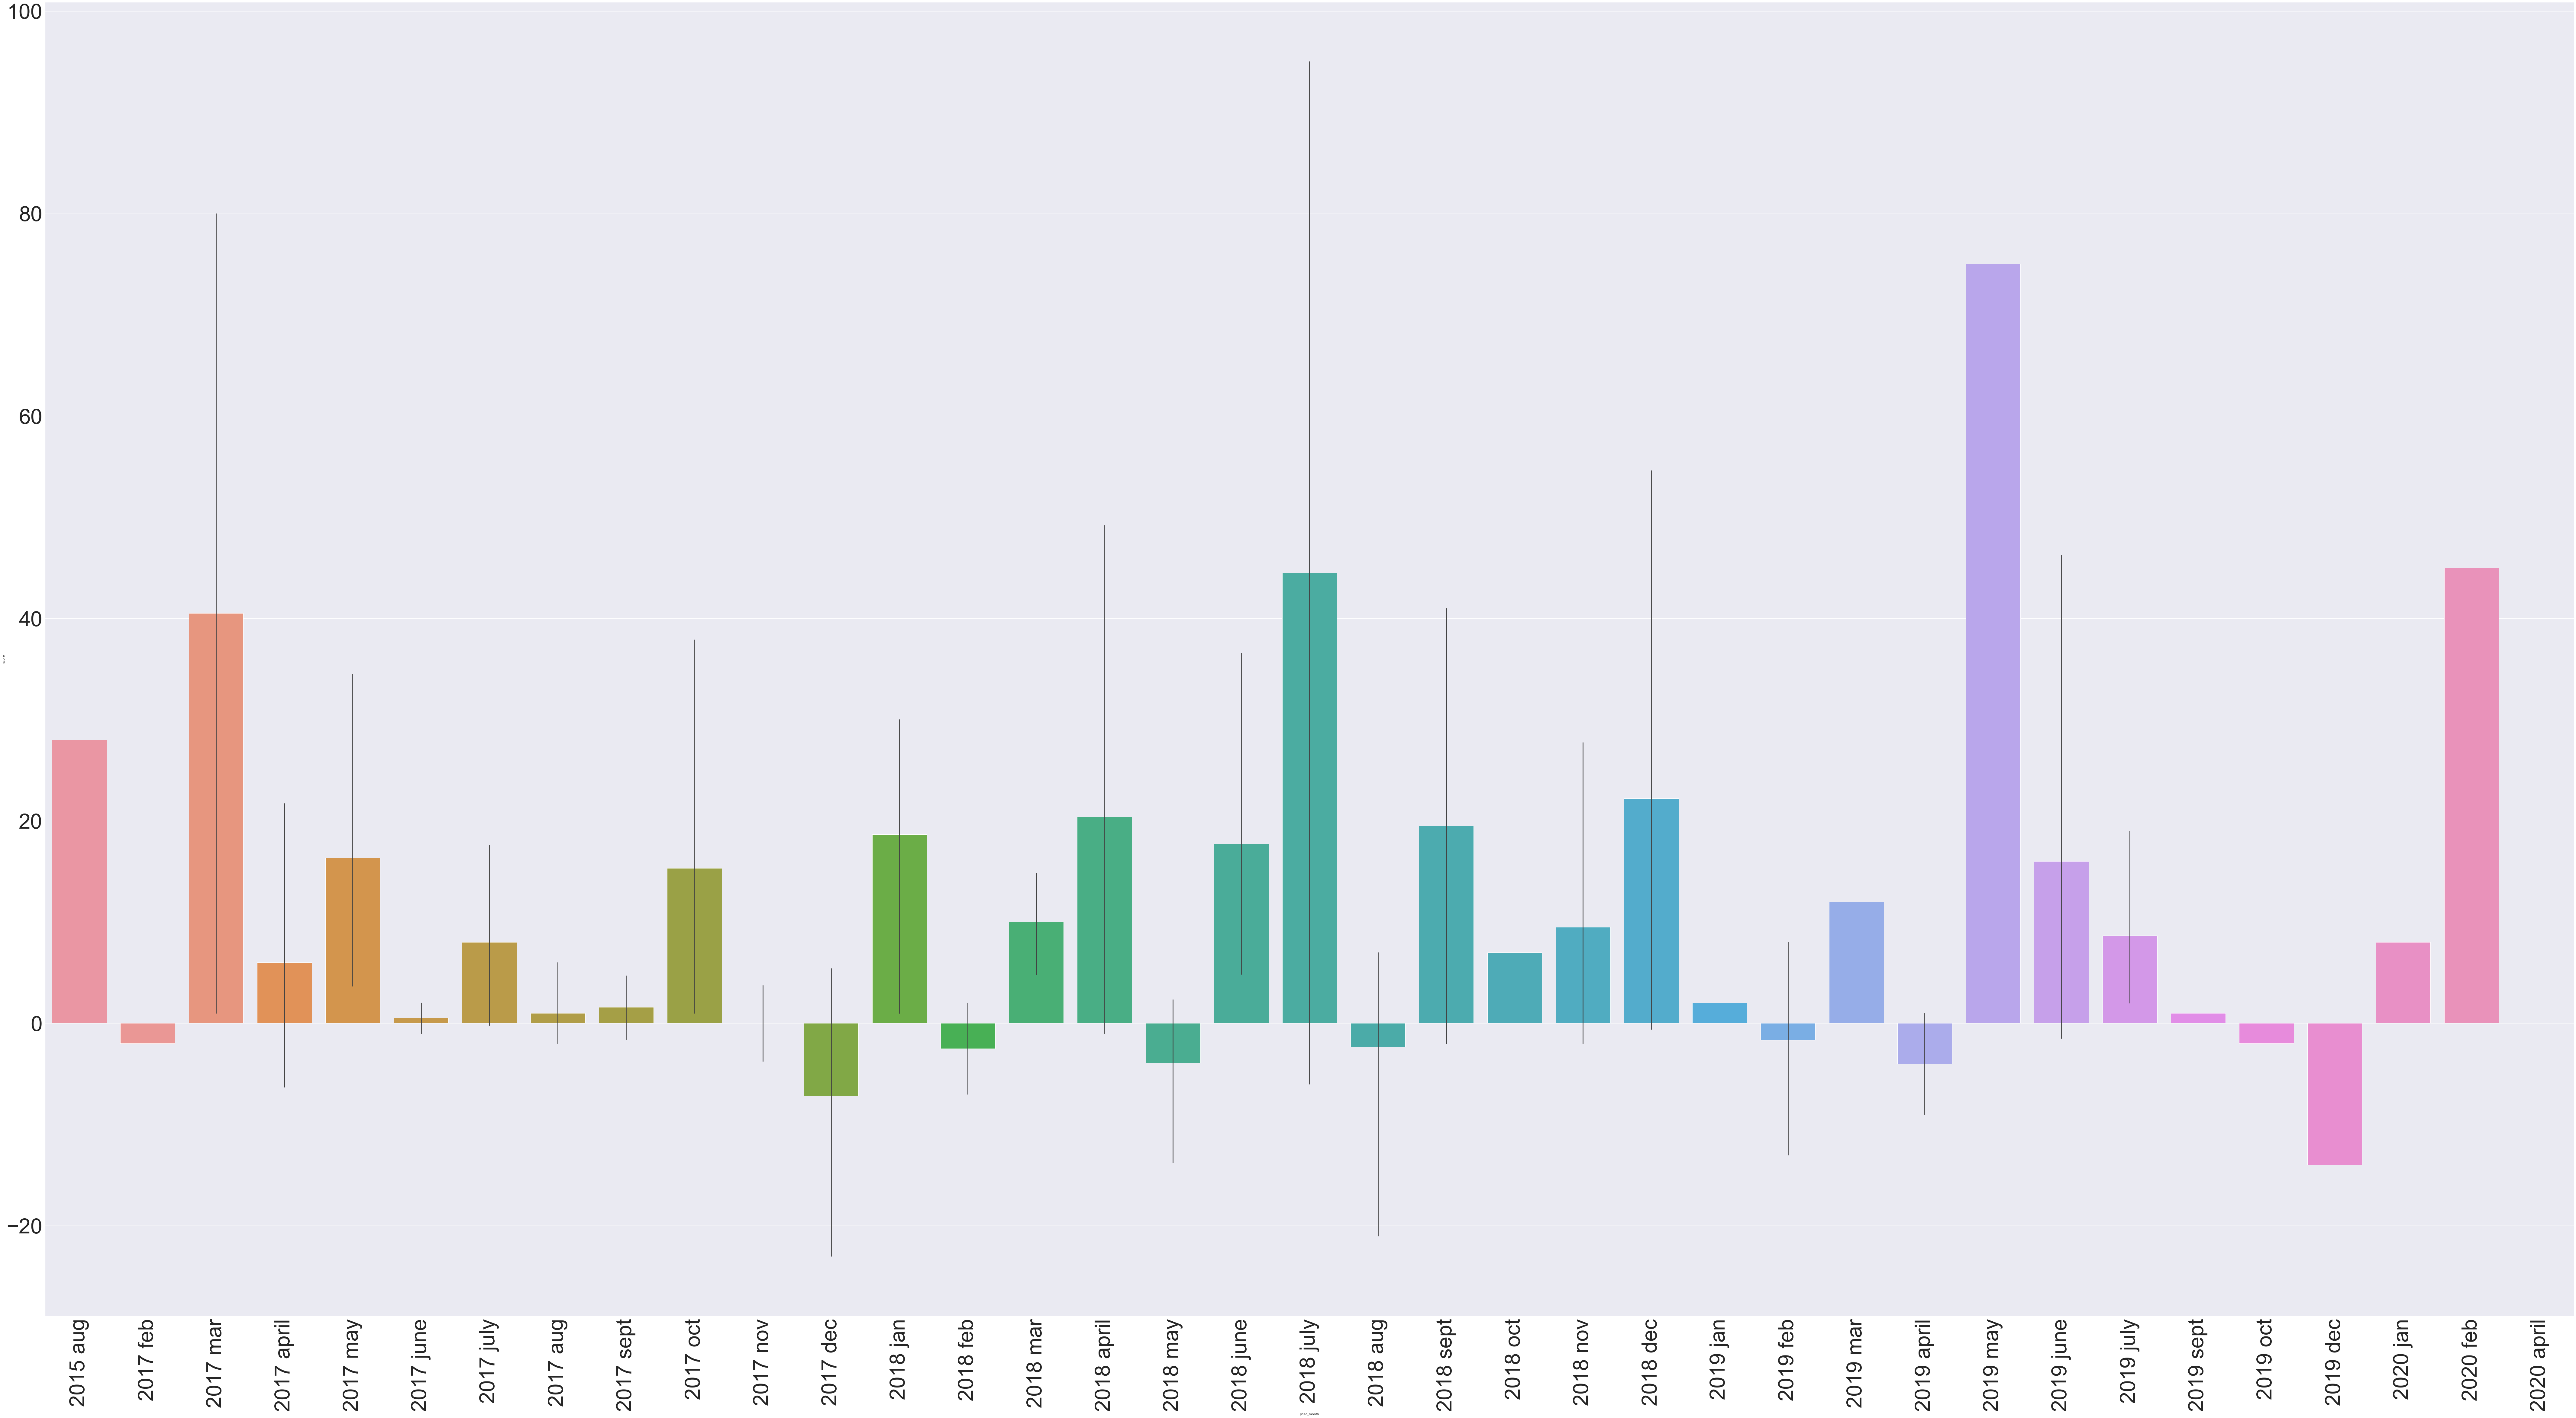

In [51]:
fig, ax = plt.subplots(figsize = (150,80))
sns.barplot(sent[sent['mentioned(entry)']>0]['year_month'], sent[sent['mentioned(entry)']>0]['score'], ax=ax)
plt.xticks(fontsize=70, rotation=90)
plt.yticks(fontsize=70)